# Lec04 - Multivariate Regressions.

*   Section 0. Loading data with preprocessing.
*   Section 1. Univariate regression.
*   Section 2. Multivariate regression.

## Section 0. Loading the data

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# load the csv file using pandas
df = pd.read_csv('SampleDataset/Florida_ct.csv', index_col = 0)

In [3]:
df

,pop_total,sex_total,sex_male,sex_female,age_median,households,race_total,race_white,race_black,race_native,...,travel_walk_ratio,travel_work_home_ratio,edu_bachelor_ratio,edu_master_ratio,edu_phd_ratio,edu_higher_edu_ratio,employment_unemployed_ratio,vehicle_per_capita,vehicle_per_household,vacancy_ratio
0,2812.0,2812.0,1383.0,1429.0,39.4,931.0,2812.0,2086.0,517.0,0.0,...,0.014815,0.024242,0.183838,0.029798,0.003030,0.216667,0.286635,0.528094,1.595059,0.155938
1,4709.0,4709.0,2272.0,2437.0,34.2,1668.0,4709.0,2382.0,1953.0,0.0,...,0.022150,0.004615,0.135222,0.040245,0.003220,0.178686,0.318327,0.460183,1.299161,0.152869
2,5005.0,5005.0,2444.0,2561.0,34.1,1379.0,5005.0,2334.0,2206.0,224.0,...,0.026141,0.027913,0.213247,0.064620,0.007431,0.285299,0.366755,0.450949,1.636693,0.162211
3,6754.0,6754.0,2934.0,3820.0,31.3,2238.0,6754.0,4052.0,1671.0,326.0,...,0.052697,0.004054,0.093379,0.082510,0.012599,0.188488,0.314452,0.474830,1.432976,0.178716
4,3021.0,3021.0,1695.0,1326.0,44.1,1364.0,3021.0,2861.0,121.0,0.0,...,0.003014,0.013059,0.219868,0.138631,0.007064,0.365563,0.218447,0.659053,1.459677,0.335930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4162,15742.0,15742.0,7957.0,7785.0,41.0,5517.0,15742.0,13894.0,1128.0,64.0,...,0.000000,0.062212,0.164241,0.084891,0.002066,0.251197,0.401551,0.426820,1.217872,0.099118
4163,5723.0,5723.0,2914.0,2809.0,43.0,2001.0,5723.0,4664.0,482.0,0.0,...,0.017050,0.047581,0.215161,0.084563,0.007005,0.306730,0.411036,0.440678,1.260370,0.039827
4164,10342.0,10342.0,4657.0,5685.0,37.6,3746.0,10342.0,7956.0,1351.0,13.0,...,0.000000,0.038862,0.137002,0.030591,0.002049,0.169643,0.353295,0.482692,1.332621,0.041208
4165,8960.0,8960.0,4166.0,4794.0,37.2,3324.0,8960.0,6286.0,1831.0,0.0,...,0.024021,0.064132,0.174399,0.063014,0.003126,0.240540,0.363482,0.478571,1.290012,0.017440


In [4]:
# Preprocessing.
# 1. creating an education group column with two values
df['edu_dummy'] = 1 # assigning the high education group
df.loc[df['edu_higher_edu_ratio'] < 0.3, 'edu_dummy'] = 0 # assigning the low education group

## Section 1. Univariate regression (recap)

In [5]:
# choose the independent variable
X = df['inc_median_household']
# add a constant to the independent variable
X = sm.add_constant(X)
# choose the dependent var
y = df['property_value_median']

# fitting the model.
# launch the model using the independent and dependent variables
model = sm.OLS(y, X)
# fitting the model
results = model.fit()

# evaluate the model
print("R2: ", results.rsquared)

# report the results.
print(results.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
R2:  0.5678562456275715
                              OLS Regression Results                             
Dep. Variable:     property_value_median   R-squared:                       0.568
Model:                               OLS   Adj. R-squared:                  0.568
Method:                    Least Squares   F-statistic:                     5473.
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:46:12   Log-Likelihood:                -54606.
No. Observations:                   4167   AIC:                         1.092e+05
Df Residuals:                       4165   BIC:                         1.092e+05
Df Model:                              1                              

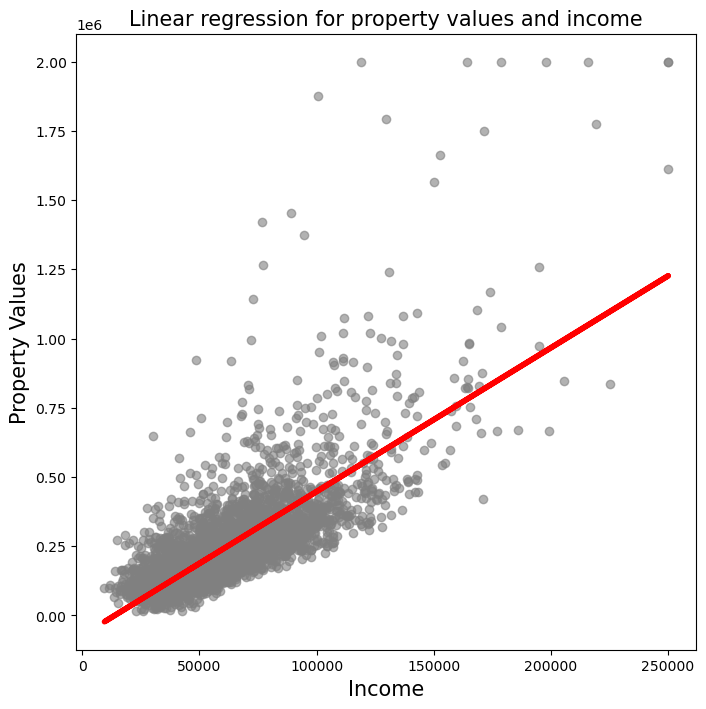

In [6]:
# Comparing the predicted and true values
# plot the fitted line
property_value_predicted = results.predict()

# another way to plot
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(df['inc_median_household'], df['property_value_median'], color = 'grey', alpha = 0.6)
ax.plot(df['inc_median_household'], property_value_predicted, color = 'red', lw = 4)
ax.set_xlabel('Income', fontsize = 15)
ax.set_ylabel('Property Values', fontsize = 15)
ax.set_title('Linear regression for property values and income', fontsize = 15)
plt.show()

## Section 2. Multivariable regression

**Baseline Regression 1**

In [7]:
# First baseline regression (univariate regression)
# choose the independent variable
X = df['inc_median_household']
# add a constant to the independent variable
X = sm.add_constant(X)
# choose the dependent var
y = df['property_value_median']

# fitting the model.
# launch the model using the independent and dependent variables
model1 = sm.OLS(y, X)
# fitting the model
results1 = model1.fit()

# report the results.
print(results1.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                              OLS Regression Results                             
Dep. Variable:     property_value_median   R-squared:                       0.568
Model:                               OLS   Adj. R-squared:                  0.568
Method:                    Least Squares   F-statistic:                     5473.
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:46:15   Log-Likelihood:                -54606.
No. Observations:                   4167   AIC:                         1.092e+05
Df Residuals:                       4165   BIC:                         1.092e+05
Df Model:                              1                                         
Covariance T

**Regression with two independent variables**

In [8]:
# choose the independent variable
var_list = ['inc_median_household', 'households']
X = df[var_list]
# add a constant to the independent variable
X = sm.add_constant(X)
# choose the dependent var
y = df['property_value_median']

# fitting the model.
# launch the model using the independent and dependent variables
model2 = sm.OLS(y, X)
# fitting the model
results2 = model2.fit()

# report the results.
print(results2.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                              OLS Regression Results                             
Dep. Variable:     property_value_median   R-squared:                       0.575
Model:                               OLS   Adj. R-squared:                  0.574
Method:                    Least Squares   F-statistic:                     2812.
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:46:16   Log-Likelihood:                -54573.
No. Observations:                   4167   AIC:                         1.092e+05
Df Residuals:                       4164   BIC:                         1.092e+05
Df Model:                              2                                         
Covariance T

**Regression with multiple independent variables**

In [9]:
# create the third regression (multivariate regression)
# choose the independent variable
var_list = ['inc_median_household',
            'households', #'pop_total',
            'travel_driving_ratio', 'travel_pt_ratio', 'travel_taxi_ratio', 'travel_work_home_ratio',
            'edu_higher_edu_ratio', 'edu_dummy',
            'household_size_avg',
            'vacancy_ratio', 'rent_median',
            'race_white_ratio', #'race_black_ratio',
            'race_asian_ratio'
            ]
X = df[var_list]
# add a constant to the independent variable
X = sm.add_constant(X)
# choose the dependent var
y = df['property_value_median']

# fitting the model.
# launch the model using the independent and dependent variables
model3 = sm.OLS(y, X)
# fitting the model
results3 = model3.fit()

# report the results.
print(results3.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                              OLS Regression Results                             
Dep. Variable:     property_value_median   R-squared:                       0.681
Model:                               OLS   Adj. R-squared:                  0.680
Method:                    Least Squares   F-statistic:                     680.8
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:46:17   Log-Likelihood:                -53976.
No. Observations:                   4167   AIC:                         1.080e+05
Df Residuals:                       4153   BIC:                         1.081e+05
Df Model:                             13                                         
Covariance T

**Regression with enriched income variable**

In [10]:
# create the fourth regression (multivariate regression)
# enrich the main variable of interest.
# 1. quadratic term
df['inc_median_household_squared'] = df['inc_median_household'] **2 # high income

# 2. discrete
df['inc_median_household_discrete'] = 1 # high income
df.loc[df['inc_median_household'] < 50000,'inc_median_household_discrete'] = 0 # low income

# adding the quadratic term.
var_list = ['inc_median_household', 'inc_median_household_squared', #'inc_median_household_discrete',
            'households', #'pop_total',
            'travel_driving_ratio', 'travel_pt_ratio', 'travel_taxi_ratio', 'travel_work_home_ratio',
            'edu_higher_edu_ratio', 'edu_dummy',
            'household_size_avg',
            'vacancy_ratio', 'rent_median',
            'race_white_ratio', #'race_black_ratio',
            'race_asian_ratio'
            ]
X = df[var_list]
# add a constant to the independent variable
X = sm.add_constant(X)
# choose the dependent var
y = df['property_value_median']

# fitting the model.
# launch the model using the independent and dependent variables
model4 = sm.OLS(y, X)
# fitting the model
results4 = model4.fit()

# report the results.
print(results4.summary())


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                              OLS Regression Results                             
Dep. Variable:     property_value_median   R-squared:                       0.700
Model:                               OLS   Adj. R-squared:                  0.699
Method:                    Least Squares   F-statistic:                     693.5
Date:                   Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                           16:46:17   Log-Likelihood:                -53842.
No. Observations:                   4167   AIC:                         1.077e+05
Df Residuals:                       4152   BIC:                         1.078e+05
Df Model:                             14                                         
Covariance T

### **Exercise.** Use the automobile usage as the dependent variable. Then conduct several multivariable regressions and choose the final model for interpretation.

In [11]:
df.columns

Index(['pop_total', 'sex_total', 'sex_male', 'sex_female', 'age_median',
       'households', 'race_total', 'race_white', 'race_black', 'race_native',
       'race_asian', 'inc_total_pop', 'inc_no_pop', 'inc_with_pop',
       'inc_pop_10k', 'inc_pop_1k_15k', 'inc_pop_15k_25k', 'inc_pop_25k_35k',
       'inc_pop_35k_50k', 'inc_pop_50k_65k', 'inc_pop_65k_75k', 'inc_pop_75k',
       'inc_median_ind', 'travel_total_to_work', 'travel_driving_to_work',
       'travel_pt_to_work', 'travel_taxi_to_work', 'travel_cycle_to_work',
       'travel_walk_to_work', 'travel_work_from_home', 'edu_total_pop',
       'bachelor_male_25_34', 'master_phd_male_25_34', 'bachelor_male_35_44',
       'master_phd_male_35_44', 'bachelor_male_45_64', 'master_phd_male_45_64',
       'bachelor_male_65_over', 'master_phd_male_65_over',
       'bachelor_female_25_34', 'master_phd_female_25_34',
       'bachelor_female_35_44', 'master_phd_female_35_44',
       'bachelor_female_45_64', 'master_phd_female_45_64',
       '